In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# City Data

In [2]:
data_city= pd.read_csv('Raw Data/Historical weather data/Data_files_used/city_attributes.csv')
data_city.head()

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683


# Humidity

In [3]:
#Read humidity data file as csv 
data_humidity=pd.read_csv('Raw Data/Historical weather data/Data_files_used/humidity.csv', index_col='datetime', parse_dates=['datetime'])

#save dataframe and rename columns
df_humidity= pd.DataFrame(data_humidity['New York']).rename(columns={'New York':'Humidity(%)'})

df_humidity.head()

,Humidity(%)
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,58.0
2012-10-01 14:00:00,57.0
2012-10-01 15:00:00,57.0
2012-10-01 16:00:00,57.0


# Pressure

In [4]:
#Read pressure data file as csv 
data_pressure=pd.read_csv('Raw Data/Historical weather data/Data_files_used/pressure.csv',index_col='datetime', parse_dates=['datetime'])

#save dataframe and rename columns
df_pressure= pd.DataFrame(data_pressure['New York']).rename(columns={'New York':'Pressure(Torr)'})

#Show DataFrame
df_pressure.head()

,Pressure(Torr)
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,1012.0
2012-10-01 14:00:00,1012.0
2012-10-01 15:00:00,1012.0
2012-10-01 16:00:00,1012.0


# Temperature

In [5]:
#Read temperature data file as csv 
data_temp=pd.read_csv('Raw Data/Historical weather data/Data_files_used/temperature.csv', index_col='datetime', parse_dates=['datetime'])

#save dataframe and rename columns
df_temp= pd.DataFrame(data_temp['New York']).rename(columns={'New York':'Temp(K)'})

#convert temperature in Kelvin to degree Celcius
df_temp['Temp(C)']= df_temp['Temp(K)']- 273.15

#Show DataFrame
df_temp.head()

,Temp(K),Temp(C)
datetime,,
2012-10-01 12:00:00,NaN,NaN
2012-10-01 13:00:00,288.220000,15.070000
2012-10-01 14:00:00,288.247676,15.097676
2012-10-01 15:00:00,288.326940,15.176940
2012-10-01 16:00:00,288.406203,15.256203


# Weather Description

In [6]:
#Read Weather data file as csv 
data_weather=pd.read_csv('Raw Data/Historical weather data/Data_files_used/weather_description.csv', index_col='datetime', parse_dates=['datetime'])

#save dataframe and rename columns
df_weather= pd.DataFrame(data_weather['New York']).rename(columns={'New York':'Weather'})

#Show DataFrame
df_weather.head()

,Weather
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,few clouds
2012-10-01 14:00:00,few clouds
2012-10-01 15:00:00,few clouds
2012-10-01 16:00:00,few clouds


In [7]:
df_weather['Weather'].value_counts()

sky is clear                           11601
broken clouds                           6263
mist                                    5415
scattered clouds                        4595
overcast clouds                         4481
light rain                              4002
few clouds                              3329
fog                                     1085
moderate rain                            950
haze                                     691
light intensity drizzle                  408
light snow                               383
heavy intensity rain                     372
drizzle                                  224
heavy snow                               130
proximity thunderstorm                   114
snow                                      99
very heavy rain                           94
thunderstorm                              74
thunderstorm with light rain              36
dust                                      21
heavy intensity drizzle                   20
thundersto

In [8]:
df_weather['Weather']=df_weather['Weather'].replace({'drizzle':'Drizzle','light intensity drizzle':'Drizzle','heavy intensity drizzle':'Drizzle',
                                                     'moderate rain':'Rainy','light rain':'Rainy','heavy intensity rain':'Rainy','very heavy rain':'Rainy', 
                                                     'shower rain':'Rainy', 'light intensity shower rain':'Rainy', 'freezing rain':'Rainy',
                                                     'scattered clouds':'Cloudy','few clouds':'Cloudy','broken clouds':'Cloudy',
                                                   'overcast clouds':'Cloudy','sky is clear':'Clear',
                                                     'light snow':'Snow', 'snow':'Snow', 'heavy snow':'Snow',
                                                     'thunderstorm':'Thunderstorm', 'proximity thunderstorm':'Thunderstorm','thunderstorm with light rain':'Thunderstorm',
                                                     'thunderstorm with rain':'Thunderstorm',  'thunderstorm with heavy rain':'Thunderstorm', 'squalls':'Thunderstorm',
                                                     'proximity thunderstorm with rain':'Thunderstorm',  'thunderstorm with light drizzle':'Thunderstorm', 
                                                     'proximity thunderstorm with drizzle':'Thunderstorm',  'heavy thunderstorm':'Thunderstorm', 
                                                     'haze':'Haze', 'mist':'Mist', 'light rain and snow':'Mist', 
                                                   'fog':'Fog', 'smoke':'Haze',
                                                    'sand/dust whirls':'Dust', 'dust':'Dust', 'sand':'Dust'
                                                    })

df_weather['Weather'].value_counts()

Cloudy          18668
Clear           11601
Mist             5426
Rainy            5426
Fog              1085
Haze              700
Drizzle           652
Snow              612
Thunderstorm      267
Dust               23
Name: Weather, dtype: int64

# Wind Speed

In [9]:
#Read Weather data file as csv 
data_windspeed=pd.read_csv('Raw Data/Historical weather data/Data_files_used/wind_speed.csv',index_col='datetime', parse_dates=['datetime'])

#save dataframe and rename columns
df_windspeed= pd.DataFrame(data_windspeed['New York']).rename(columns={'New York':'Wind Speed'})

#Show DataFrame
df_windspeed.head()

,Wind Speed
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,7.0
2012-10-01 14:00:00,7.0
2012-10-01 15:00:00,7.0
2012-10-01 16:00:00,7.0


# Combined City Data 

In [10]:
#df= [df_temp, df_humidity, df_pressure, df_weather, df_windspeed]

#Create DataFrames to merge weather data for New York

df1= pd.merge(df_temp, df_humidity, on='datetime', how='outer')
df2=pd.merge(df1, df_pressure, on='datetime', how='outer')
df3=pd.merge(df2, df_weather, on='datetime', how='outer')
df4=pd.merge(df3,df_windspeed, on='datetime', how='outer')

#Create date time object
df4=df4.reset_index()
df4['datetimeobj'] =  pd.to_datetime(df4['datetime'], format='%Y-%m-%d %H:%M:%S.%f')

#Define final weather_data DataFrame

weather_data_NY=pd.DataFrame(df4)
weather_data_NY['Year']= df4['datetime'].dt.year
weather_data_NY['Month']= df4['datetime'].dt.month
weather_data_NY['Hour']= df4['datetime'].dt.hour

#Rearrange Columns for the final dataframe and set index

weather_data_NY=weather_data_NY.loc[:, ['datetime','Year','Month','Hour','Temp(K)','Temp(C)','Humidity(%)',
                                        'Pressure(Torr)','Weather','Wind Speed']]
weather_data_NY.head()

,datetime,Year,Month,Hour,Temp(K),Temp(C),Humidity(%),Pressure(Torr),Weather,Wind Speed
0,2012-10-01 12:00:00,2012,10,12,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,2012,10,13,288.220000,15.070000,58.0,1012.0,Cloudy,7.0
2,2012-10-01 14:00:00,2012,10,14,288.247676,15.097676,57.0,1012.0,Cloudy,7.0
3,2012-10-01 15:00:00,2012,10,15,288.326940,15.176940,57.0,1012.0,Cloudy,7.0
4,2012-10-01 16:00:00,2012,10,16,288.406203,15.256203,57.0,1012.0,Cloudy,7.0


# NYC Cab Ride Data

In [11]:
# Read csv file containing NYC taxi trip duration data for problem 2
taxi_dataQ2= pd.read_csv('Raw Data/nyc-taxi-trip-duration/NYCtaxi_trip_Q2.csv')
taxi_dataQ2.head()

C:\Users\ruchi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,2,3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration(sec)
0,id2875421,2.0,3/14/2016 17:24,3/14/2016 17:32,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455.0
1,id2377394,1.0,6/12/2016 0:43,6/12/2016 0:54,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663.0
2,id3858529,2.0,1/19/2016 11:35,1/19/2016 12:10,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
3,id3504673,2.0,4/6/2016 19:32,4/6/2016 19:39,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429.0
4,id2181028,2.0,3/26/2016 13:30,3/26/2016 13:38,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435.0


In [12]:
taxi_dataQ2['datetime'] =  pd.to_datetime(taxi_dataQ2['pickup_datetime'], format='%m/%d/%Y %H:%M')
taxi_dataQ2['Hour']= taxi_dataQ2['datetime'].dt.hour
taxi_dataQ2['Year']= taxi_dataQ2['datetime'].dt.year
taxi_dataQ2['Month']= taxi_dataQ2['datetime'].dt.month
taxi_dataQ2.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration(sec),datetime,Hour,Year,Month
0,id2875421,2.0,3/14/2016 17:24,3/14/2016 17:32,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455.0,2016-03-14 17:24:00,17.0,2016.0,3.0
1,id2377394,1.0,6/12/2016 0:43,6/12/2016 0:54,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663.0,2016-06-12 00:43:00,0.0,2016.0,6.0
2,id3858529,2.0,1/19/2016 11:35,1/19/2016 12:10,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124.0,2016-01-19 11:35:00,11.0,2016.0,1.0
3,id3504673,2.0,4/6/2016 19:32,4/6/2016 19:39,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429.0,2016-04-06 19:32:00,19.0,2016.0,4.0
4,id2181028,2.0,3/26/2016 13:30,3/26/2016 13:38,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435.0,2016-03-26 13:30:00,13.0,2016.0,3.0


In [13]:
# Drop the rows that have NA-values
taxi_dataQ2.dropna(how='all',inplace=True)
taxi_dataQ2.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration(sec),datetime,Hour,Year,Month
0,id2875421,2.0,3/14/2016 17:24,3/14/2016 17:32,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455.0,2016-03-14 17:24:00,17.0,2016.0,3.0
1,id2377394,1.0,6/12/2016 0:43,6/12/2016 0:54,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663.0,2016-06-12 00:43:00,0.0,2016.0,6.0
2,id3858529,2.0,1/19/2016 11:35,1/19/2016 12:10,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124.0,2016-01-19 11:35:00,11.0,2016.0,1.0
3,id3504673,2.0,4/6/2016 19:32,4/6/2016 19:39,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429.0,2016-04-06 19:32:00,19.0,2016.0,4.0
4,id2181028,2.0,3/26/2016 13:30,3/26/2016 13:38,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435.0,2016-03-26 13:30:00,13.0,2016.0,3.0


In [14]:
# Drop columns that are not required
taxi_dataQ2 = taxi_dataQ2.drop(["vendor_id","pickup_datetime","dropoff_datetime","passenger_count","dropoff_longitude","dropoff_latitude","store_and_fwd_flag"], axis=1)

# Convert 'Hour','Year',and 'Month' to integer
taxi_dataQ2["Hour"] = pd.to_numeric(taxi_dataQ2["Hour"])
taxi_dataQ2["Year"] = pd.to_numeric(taxi_dataQ2["Year"])
taxi_dataQ2["Month"] = pd.to_numeric(taxi_dataQ2["Month"])

taxi_dataQ2["Hour"] = taxi_dataQ2["Hour"].astype(int)
taxi_dataQ2["Year"] = taxi_dataQ2["Year"].astype(int)
taxi_dataQ2["Month"] = taxi_dataQ2["Month"].astype(int)

taxi_dataQ2.head()

,id,pickup_longitude,pickup_latitude,trip_duration(sec),datetime,Hour,Year,Month
0,id2875421,-73.982155,40.767937,455.0,2016-03-14 17:24:00,17,2016,3
1,id2377394,-73.980415,40.738564,663.0,2016-06-12 00:43:00,0,2016,6
2,id3858529,-73.979027,40.763939,2124.0,2016-01-19 11:35:00,11,2016,1
3,id3504673,-74.010040,40.719971,429.0,2016-04-06 19:32:00,19,2016,4
4,id2181028,-73.973053,40.793209,435.0,2016-03-26 13:30:00,13,2016,3


In [15]:
# Round off 'datetime' column values around nearest hour
taxi_dataQ2 = taxi_dataQ2.assign(datetime=taxi_dataQ2.datetime.dt.round('H'))
taxi_dataQ2.head()

,id,pickup_longitude,pickup_latitude,trip_duration(sec),datetime,Hour,Year,Month
0,id2875421,-73.982155,40.767937,455.0,2016-03-14 17:00:00,17,2016,3
1,id2377394,-73.980415,40.738564,663.0,2016-06-12 01:00:00,0,2016,6
2,id3858529,-73.979027,40.763939,2124.0,2016-01-19 12:00:00,11,2016,1
3,id3504673,-74.010040,40.719971,429.0,2016-04-06 20:00:00,19,2016,4
4,id2181028,-73.973053,40.793209,435.0,2016-03-26 14:00:00,13,2016,3


# NYC Cab ride data with weather conditions

In [16]:
ride_data = pd.merge(taxi_dataQ2, weather_data_NY, on='datetime', how='left')
ride_data.head()

,id,pickup_longitude,pickup_latitude,trip_duration(sec),datetime,Hour_x,Year_x,Month_x,Year_y,Month_y,Hour_y,Temp(K),Temp(C),Humidity(%),Pressure(Torr),Weather,Wind Speed
0,id2875421,-73.982155,40.767937,455.0,2016-03-14 17:00:00,17,2016,3,2016,3,17,279.557766,6.407766,81.0,1024.0,Rainy,6.0
1,id2377394,-73.980415,40.738564,663.0,2016-06-12 01:00:00,0,2016,6,2016,6,1,300.340000,27.190000,50.0,1005.0,Rainy,4.0
2,id3858529,-73.979027,40.763939,2124.0,2016-01-19 12:00:00,11,2016,1,2016,1,12,264.295125,-8.854875,53.0,1017.0,Clear,6.0
3,id3504673,-74.010040,40.719971,429.0,2016-04-06 20:00:00,19,2016,4,2016,4,20,280.670000,7.520000,39.0,1021.0,Haze,6.0
4,id2181028,-73.973053,40.793209,435.0,2016-03-26 14:00:00,13,2016,3,2016,3,14,279.040000,5.890000,52.0,1026.0,Cloudy,4.0


In [17]:
# Drop columns that are not required
ride_data = ride_data.drop(["Hour_x","Year_x","Month_x"], axis=1)
ride_data.head()

,id,pickup_longitude,pickup_latitude,trip_duration(sec),datetime,Year_y,Month_y,Hour_y,Temp(K),Temp(C),Humidity(%),Pressure(Torr),Weather,Wind Speed
0,id2875421,-73.982155,40.767937,455.0,2016-03-14 17:00:00,2016,3,17,279.557766,6.407766,81.0,1024.0,Rainy,6.0
1,id2377394,-73.980415,40.738564,663.0,2016-06-12 01:00:00,2016,6,1,300.340000,27.190000,50.0,1005.0,Rainy,4.0
2,id3858529,-73.979027,40.763939,2124.0,2016-01-19 12:00:00,2016,1,12,264.295125,-8.854875,53.0,1017.0,Clear,6.0
3,id3504673,-74.010040,40.719971,429.0,2016-04-06 20:00:00,2016,4,20,280.670000,7.520000,39.0,1021.0,Haze,6.0
4,id2181028,-73.973053,40.793209,435.0,2016-03-26 14:00:00,2016,3,14,279.040000,5.890000,52.0,1026.0,Cloudy,4.0


In [18]:
# Rename column labels
ride_data = ride_data.rename(columns={'Year_y':'Year','Month_y':'Month','Hour_y':'Hour'})
ride_data.head()

,id,pickup_longitude,pickup_latitude,trip_duration(sec),datetime,Year,Month,Hour,Temp(K),Temp(C),Humidity(%),Pressure(Torr),Weather,Wind Speed
0,id2875421,-73.982155,40.767937,455.0,2016-03-14 17:00:00,2016,3,17,279.557766,6.407766,81.0,1024.0,Rainy,6.0
1,id2377394,-73.980415,40.738564,663.0,2016-06-12 01:00:00,2016,6,1,300.340000,27.190000,50.0,1005.0,Rainy,4.0
2,id3858529,-73.979027,40.763939,2124.0,2016-01-19 12:00:00,2016,1,12,264.295125,-8.854875,53.0,1017.0,Clear,6.0
3,id3504673,-74.010040,40.719971,429.0,2016-04-06 20:00:00,2016,4,20,280.670000,7.520000,39.0,1021.0,Haze,6.0
4,id2181028,-73.973053,40.793209,435.0,2016-03-26 14:00:00,2016,3,14,279.040000,5.890000,52.0,1026.0,Cloudy,4.0


In [19]:
# Round off temperature values
ride_data = ride_data.round({'Temp(K)': 0, 'Temp(C)': 0})
ride_data.head()

,id,pickup_longitude,pickup_latitude,trip_duration(sec),datetime,Year,Month,Hour,Temp(K),Temp(C),Humidity(%),Pressure(Torr),Weather,Wind Speed
0,id2875421,-73.982155,40.767937,455.0,2016-03-14 17:00:00,2016,3,17,280.0,6.0,81.0,1024.0,Rainy,6.0
1,id2377394,-73.980415,40.738564,663.0,2016-06-12 01:00:00,2016,6,1,300.0,27.0,50.0,1005.0,Rainy,4.0
2,id3858529,-73.979027,40.763939,2124.0,2016-01-19 12:00:00,2016,1,12,264.0,-9.0,53.0,1017.0,Clear,6.0
3,id3504673,-74.010040,40.719971,429.0,2016-04-06 20:00:00,2016,4,20,281.0,8.0,39.0,1021.0,Haze,6.0
4,id2181028,-73.973053,40.793209,435.0,2016-03-26 14:00:00,2016,3,14,279.0,6.0,52.0,1026.0,Cloudy,4.0


In [20]:
ride_data.describe()

,pickup_longitude,pickup_latitude,trip_duration(sec),Year,Month,Hour,Temp(K),Temp(C),Humidity(%),Pressure(Torr),Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-73.973190,40.751030,920.205900,2016.0,3.52370,13.636700,283.376500,10.208100,58.556400,1015.878000,3.843500
std,0.038532,0.027962,2873.617443,0.0,1.69379,6.578666,9.400425,9.397778,21.742316,8.192095,2.317789
min,-74.209854,40.612793,2.000000,2016.0,1.00000,0.000000,255.000000,-18.000000,10.000000,990.000000,0.000000
25%,-73.991777,40.737593,395.000000,2016.0,2.00000,9.000000,276.000000,3.000000,41.000000,1010.000000,2.000000
50%,-73.981865,40.754478,658.000000,2016.0,4.00000,14.000000,283.000000,10.000000,57.000000,1016.000000,3.000000
75%,-73.966635,40.768284,1064.000000,2016.0,5.00000,19.000000,290.000000,17.000000,76.000000,1021.000000,5.000000
max,-73.756172,40.874420,86357.000000,2016.0,7.00000,23.000000,305.000000,32.000000,100.000000,1044.000000,14.000000


In [21]:
ride_data['Weather'].value_counts()

Cloudy          5140
Clear           1557
Mist            1279
Rainy           1094
Haze             333
Fog              254
Snow             187
Drizzle          125
Thunderstorm      31
Name: Weather, dtype: int64

In [22]:
# Create bins for 'Temp(C)'
bins = [-20.0, -16.0, -11.0, -6.0, -1.0, 4.0, 9.0, 14.0, 19.0, 24.0, 29.0, 35.0]
group_names = ["-20 to -15","-15 to -10","-10 to -5","-5 to 0","0 to 5","5 to 10","10 to 15","15 to 20","20 to 25","25 to 30","30 to 35"] 
ride_data["Temp Category(C)"] = pd.cut(ride_data["Temp(C)"], bins, labels=group_names)

ride_data.head()

,id,pickup_longitude,pickup_latitude,trip_duration(sec),datetime,Year,Month,Hour,Temp(K),Temp(C),Humidity(%),Pressure(Torr),Weather,Wind Speed,Temp Category(C)
0,id2875421,-73.982155,40.767937,455.0,2016-03-14 17:00:00,2016,3,17,280.0,6.0,81.0,1024.0,Rainy,6.0,5 to 10
1,id2377394,-73.980415,40.738564,663.0,2016-06-12 01:00:00,2016,6,1,300.0,27.0,50.0,1005.0,Rainy,4.0,25 to 30
2,id3858529,-73.979027,40.763939,2124.0,2016-01-19 12:00:00,2016,1,12,264.0,-9.0,53.0,1017.0,Clear,6.0,-10 to -5
3,id3504673,-74.010040,40.719971,429.0,2016-04-06 20:00:00,2016,4,20,281.0,8.0,39.0,1021.0,Haze,6.0,5 to 10
4,id2181028,-73.973053,40.793209,435.0,2016-03-26 14:00:00,2016,3,14,279.0,6.0,52.0,1026.0,Cloudy,4.0,5 to 10


In [23]:
# Count the number of cab rides booked based on 'Weather' and 'Temp Category(C)' columns
grouped_ridedata = ride_data.groupby(["Weather","Temp Category(C)"])
rides_booked = grouped_ridedata["id"].count()

# Convert to DataFrame
rides_booked_df = pd.DataFrame(rides_booked)
rides_booked_df = rides_booked_df.rename(columns={'id':'# of cab rides'})
rides_booked_df

# of cab rides
Weather      Temp Category(C)                
Clear        -20 to -15                    16
             -15 to -10                    11
             -10 to -5                    105
             -5 to 0                      153
             0 to 5                       204
             5 to 10                      152
             10 to 15                     208
             15 to 20                     251
             20 to 25                     208
             25 to 30                     246
             30 to 35                       3
Cloudy       -20 to -15                    12
             -15 to -10                    21
             -10 to -5                    117
             -5 to 0                      587
             0 to 5                      1100
             5 to 10                      913
             10 to 15                     846
             15 to 20                     639
             20 to 25                     509
             25 to 30                     359
             30 to 35                      37
Drizzle      0 to 5                        23
             5 to 10                       46
             10 to 15                      48
             15 to 20                       8
Fog          -10 to -5                      5
             -5 to 0                        1
             0 to 5                        57
             5 to 10                       63
...                                       ...
Haze         15 to 20                      46
             20 to 25                      57
             25 to 30                      47
Mist         -15 to -10                     7
             -10 to -5                     33
             -5 to 0                       66
             0 to 5                       144
             5 to 10                      319
             10 to 15                     354
             15 to 20                     214
             20 to 25                     142
Rainy        -5 to 0                       14
             0 to 5                        74
             5 to 10                      258
             10 to 15                     332
             15 to 20                     232
             20 to 25                     130
             25 to 30                      46
             30 to 35                       8
Snow         -15 to -10                    14
             -10 to -5                     39
             -5 to 0                       39
             0 to 5                        87
             5 to 10                        8
Thunderstorm 5 to 10                        2
             10 to 15                       8
             15 to 20                       1
             20 to 25                       8
             25 to 30                       9
             30 to 35                       3

[68 rows x 1 columns]

In [24]:
# Calculate total no. of rides booked
totalrides_booked = rides_booked_df['# of cab rides'].sum() 

# Calculate total no. of rides booked per weather category
rides_booked_weather = rides_booked_df.groupby("Weather").sum()
rides_booked_weather

,# of cab rides
Weather,
Clear,1557
Cloudy,5140
Drizzle,125
Fog,254
Haze,333
Mist,1279
Rainy,1094
Snow,187
Thunderstorm,31


In [25]:
# Calculate total no. of rides booked per 'Temp Category' category
rides_booked_temp = rides_booked_df.groupby("Temp Category(C)").sum()
rides_booked_temp

,# of cab rides
Temp Category(C),
-20 to -15,28
-15 to -10,54
-10 to -5,299
-5 to 0,892
0 to 5,1750
5 to 10,1792
10 to 15,1919
15 to 20,1432
20 to 25,1076


Text(0, 0.5, '# of cab rides booked')

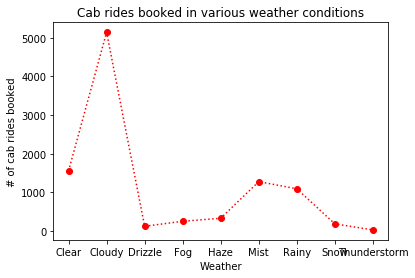

In [26]:
# Plot no. of rides booked per weather category
x_axis = list(rides_booked_weather.index)
y_axis = list(rides_booked_weather.loc[:,"# of cab rides"])

plt.plot(x_axis,y_axis, marker="o",linestyle='dotted', color='red')

# Add labels to the x and y axes
plt.title("Cab rides booked in various weather conditions")
plt.xlabel("Weather")
plt.ylabel("# of cab rides booked")
#plt.grid(axis='y')
#plt.legend(loc='best')

# Save the Figure
#plt.savefig("Images/metastatic-response.png")

# Show the Figure
#plt.show()

Text(0, 0.5, '# of cab rides booked')

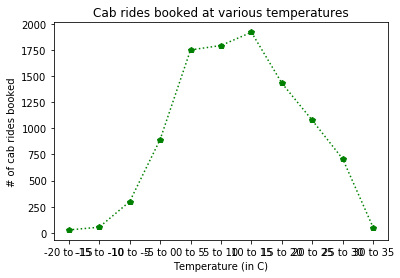

In [27]:
# Plot no. of rides booked per temperature category
x_axis = list(rides_booked_temp.index)
y_axis = list(rides_booked_temp.loc[:,"# of cab rides"])

plt.plot(x_axis,y_axis, marker="p",linestyle='dotted', color='green')

# Add labels to the x and y axes
plt.title("Cab rides booked at various temperatures")
plt.xlabel("Temperature (in C)")
plt.ylabel("# of cab rides booked")
#plt.grid(axis='y')
#plt.legend(loc='best')

# Save the Figure
#plt.savefig("Images/metastatic-response.png")

# Show the Figure
#plt.show()

TypeError: unhashable type: 'numpy.ndarray'

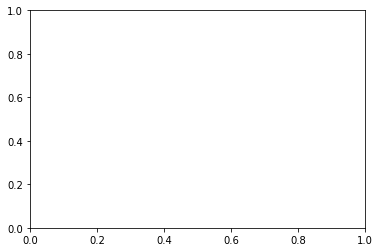

In [28]:
# Plot no. of rides booked per temperature category
x_axis = list(rides_booked_df.index)
y_axis = list(rides_booked_df.loc[:,"# of cab rides"])

plt.plot(x_axis,y_axis, marker="s",linestyle='dotted', color='yellow')